In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 1: Load Data

In [2]:
# Path of the file to read train data
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Path of the file to read test data
iowa_file_path_test = 'test.csv'
home_data_test = pd.read_csv(iowa_file_path_test)
home_data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Step 2: Train / Test Split

In [4]:
# Create target object and call it y
y = home_data.SalePrice

# Select features and create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Step 3: Build Decision Tree Model

In [5]:
# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions 
val_predictions = iowa_model.predict(val_X)

# Calculate mean absolute error
val_mae = mean_absolute_error(val_predictions, val_y)

print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 29,653


### Comparison of different Desicion Tree models

Max leaf nodes: 5  		 Mean Absolute Error:  35044
Max leaf nodes: 25  		 Mean Absolute Error:  29016
Max leaf nodes: 50  		 Mean Absolute Error:  27405
Max leaf nodes: 100  		 Mean Absolute Error:  27282
Max leaf nodes: 250  		 Mean Absolute Error:  27893
Max leaf nodes: 500  		 Mean Absolute Error:  29454

Best leaf nodes parameter: 100
Best leaf nodes model mae: 27282.50803885739


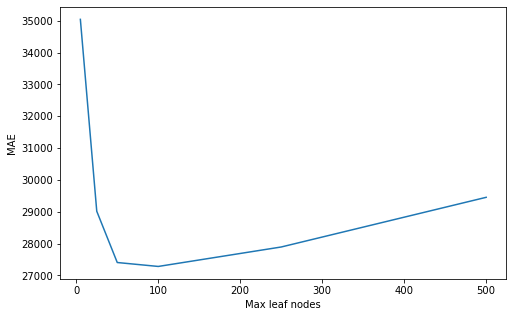

In [6]:
# Function to help compare MAE scores from different values for max_leaf_nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return mae

# Compare MAE with differing values of max_leaf_nodes
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

mae_all = {}
for max_leaf_nodes in candidate_max_leaf_nodes:
    cur_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    mae_all[max_leaf_nodes] = cur_mae
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, cur_mae))
    
# Function to find the ideal tree size from candidate_max_leaf_nodes
def best_mae(mae_all):
    keys = list(mae_all.keys())
    best_max_leaf_nodes = keys[0]
    min_mae = mae_all[keys[0]]    
    for i in range(len(keys)-1):
        if mae_all[keys[i+1]] < mae_all[keys[i]]:
            best_max_leaf_nodes = keys[i+1]
            min_mae = mae_all[keys[i+1]]
    return best_max_leaf_nodes         

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = best_mae(mae_all)
best_tree_size_mae = mae_all[best_tree_size]
print('')
print(f'Best leaf nodes parameter:', best_tree_size)
print(f'Best leaf nodes model mae:', best_tree_size_mae)

plt.figure(figsize=(8, 5))
sns.lineplot(x=list(mae_all.keys()), y=list(mae_all.values()))
plt.xlabel('Max leaf nodes')
plt.ylabel('MAE')
plt.show()

### Use best model for prediction

In [7]:
# Fit model using all data and optimal leaf nodes size
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=0)
final_model.fit(X, y)

# Make test data
test_X = home_data_test[features]

# Make test predictions 
test_predictions = final_model.predict(test_X)

# Step 4: Build Random Forest Model

In [8]:
# Now we will use Random Forest model and compare the results
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)

forest_val_prediction = forest_model.predict(val_X)
forest_val_mae = mean_absolute_error(val_y, forest_val_prediction)
print("Validation MAE for Random Forest Model: {}".format(forest_val_mae))

Validation MAE for Random Forest Model: 21857.15912981083


In [9]:
# Fit RF model using all data
forest_final_model = RandomForestRegressor(random_state=1)
forest_final_model.fit(X, y)

forest_test_predictions = forest_final_model.predict(test_X)

### Comparison of predictions

In [10]:
# Comparison of the predictions of both models
prediction_comparison = pd.DataFrame()
prediction_comparison['Decision Tree'] = test_predictions
prediction_comparison['Random Forest'] = forest_test_predictions
prediction_comparison.head(10).style.background_gradient(cmap='Blues')

,Decision Tree,Random Forest
0,125362.573333,122656.580000
1,157249.181818,156789.000000
2,182392.319444,182959.000000
3,182392.319444,178102.000000
4,190290.712500,189049.480000
5,173237.500000,180979.450000
6,190290.712500,172797.000000
7,182392.319444,173716.720000
8,190290.712500,187535.190000
9,125362.573333,116171.500000


In [11]:
# Save predictions
output = pd.DataFrame({'Id': home_data_test.Id,
                       'SalePrice': forest_test_predictions})
output.to_csv('submission.csv', index=False)